https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
https://www.learnpytorch.io/01_pytorch_workflow/

## what_were_covering = {
1: "data (prepare and load)",

2: "build model",

3: "fitting the model to data (training)",

4: "making predictions and evaluting a model (inference)",

5: "saving and loading a model",

6: "putting it all together"}

In [1]:
import torch
from torch import nn #nn contains all building blocks for neural networks
import matplotlib.pyplot as plt  

In [2]:
torch.__version__

'2.1.2+cpu'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning

Excel speadsheet

Images of any kind

Videos (YouTube has lots of data)

Audia like songs or podcasts

DNA

Text

Machine learning is a game of two parts

1. Get data into a numerical representation

2. Build a model to leapatterns in that numerical representation.

To showcase this, let's create some known data using the linear regression formula

We'll use a linear regression formula to make a straight line with known *parameters*

In [3]:
#create *known* parameters
weight=0.7
bias=0.3
 #create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

## Splitting data into training and test sets (one of the most important concepts in machine learning in general)

# Let's create a training and test set with our data

In [5]:
#create a train/test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

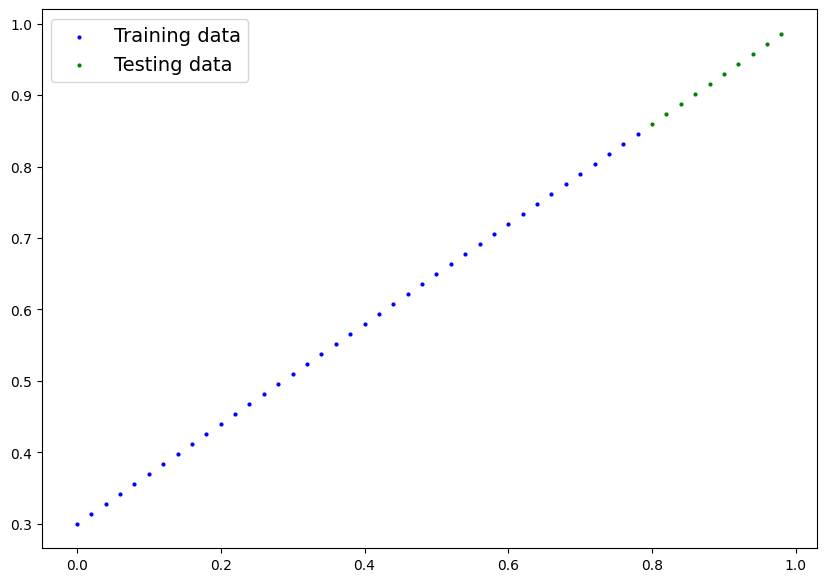

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions();

## 2. Build model
Now we've got some data, let's build a model to use the blue dots to predict the green dots.

We're going to jump right in.

We'll write the code first and then explain everything.

Let's replicate a standard linear regression model using pure PyTorch.

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

PyTorch model building essentials

torch.nn -contains all of the buildings for computational graphs (a neural network can be considered a computational graph) 
torch.nn.Parameter-what parameters should our model try and learn, often a PyTorch layer from torchinn will set these for us 
torch.nn.Module- The base class for all neural network modules, if you subclass it, you should overwrite forward() 

torch.optim-this where the optimizers in PyTorch live, they will help with gradient descent

def (forward)- All nn Module subclasses require you to overwrite forward), this method defines what happens in the forward computation

# Checking the contents of our PyTorch model



Now we've created a model, let's see what's inside...





So we can check our model parameters or what's inside our model using.parameters().

In [8]:
#create a random seed
torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.module)
model_0=LinearRegressionModel()

#checking out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making prediction using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the forward() method.

In [10]:
y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [11]:
# make predictions with model
with torch.inference_mode(): #inference is used for predictions in torch
    y_preds=model_0(X_test)
y_preds    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
#You can also do something similar with torch.no_grad(),however torch.inference_mode() is prefered
#with torch.no_grad():
#    y_preds=model_0(X_test)
#y_preds    

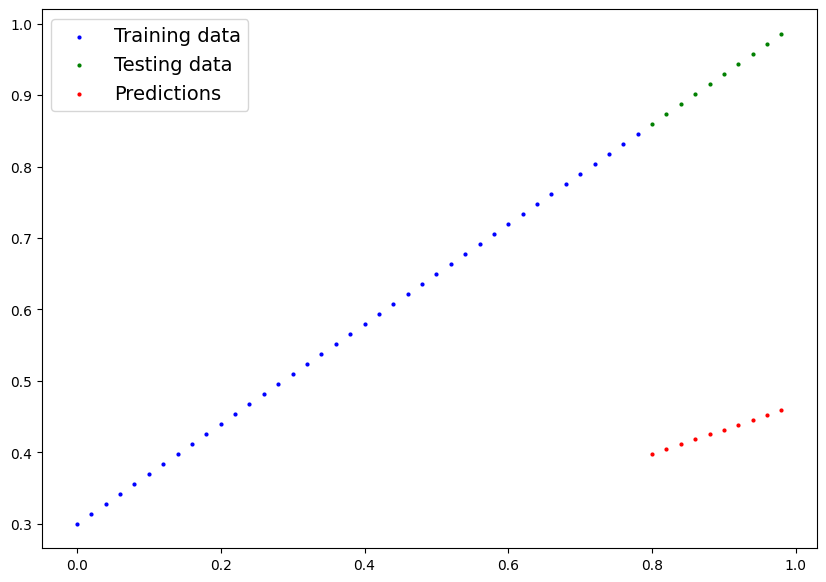

In [13]:
plot_predictions(predictions=y_preds)

##  3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some *known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

## Things we need to train:

**Loss function:* A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

**Optimizer:* Takes into account the loss of a model and adjusts the model's Parameters (e.g. weight & bias)

https://pytorch.org/docs/stable/optim.html#module-torch.optim

Inside the optimizer you'll often have to set two parameters:

params - the model parameters you'd like to optimize, for example params-node 0. parametera

1r(learning rate)-the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small ir results in small changes, a large in results in large changes)

And specifically for Pytorch,we nned 

->A training loop

-> A testing loop

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
#setup a loss function
loss_fn=nn.L1Loss() #how long our model is
 
## https://pytorch.org/docs/stable/optim.html 
#setup an optimizer

#hyperparameter -which are the datasets read by ML and DS engineers    
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each  

## Q: Which loss function and optimizer should I use?

## A: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of nn. LlLoss() and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn. BCELoss() (binary cross entropy loss).

## Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:


0 Loop through the data and do.....

1. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data-also called forward propagation

2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss backward-move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation- https://www.youtube.com/watch?v=tleHLnjs5U8)

5. Optimizer step use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent https://youtu.be/IHZwWFHWa-w

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
torch.manual_seed(42)
#an epoch is one loop through the data..(this is a hyperparameter as we've set it ourselves
epochs=100

#Track different values
epoch_counts=[]
loss_values=[]
test_loss_values=[]

#Training
#0.Loop through data
for epoch in range(epochs):
    #Set model to training mode
    model_0.train() #train mode in Pytorch sets all parameterd that requires gradient to require gradients
    
    # 1. Forward pass
    y_pred=model_0(X_train)
    
    # 2. Calculate the loss
    loss=loss_fn(y_pred,y_train)
    print(f"Loss :{loss}")
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()


    # 4. Performs backpropagation on the loss wrt parameters of the model
    loss.backward()
    #5. Step the optimzer (performs gradient descent)
    optimizer.step()  #by default how the optimiizer changes will accumulate through the loop so..we have to zero them above in step3 for next iteration of the loop
    # https://www.youtube.com/watch?v=IHZwWFHWa-w
    
    #Testing 
    model_0.eval() #turns off differeent setting in the model not need for evaluation /testing (dropout/batch norm layers)
    print(model_0.state_dict())
    #2. Calculate the loss
    with torch.inference_mode():
        test_pred=model_0(X_test)
        test_loss=loss_fn(test_pred,y_test)
    if(epoch % 10==0):
        epoch_counts.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch :{epoch} || Loss : {loss } || Test Loss "{test_loss}')
        print(model_0.state_dict())

Loss :0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch :0 || Loss : 0.31288138031959534 || Test Loss "0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss :0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss :0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss :0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss :0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss :0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss :0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss :0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss :0.22071333229541779
OrderedDict([('weights', tensor([0.3718

In [18]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values 

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

Text(0.5, 1.0, 'Training and loss curves')

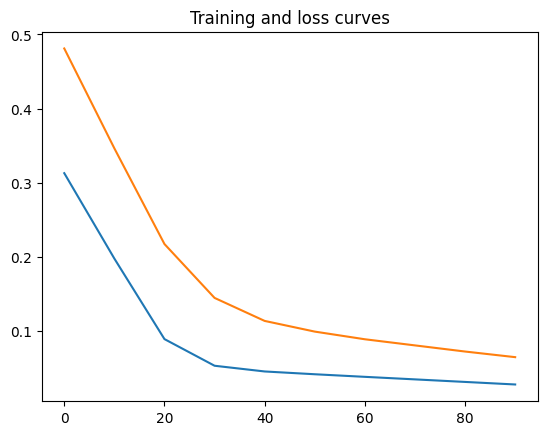

In [19]:
#plot the loss curves
plt.plot(epoch_counts,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_counts,test_loss_values,label="Test loss")
plt.title("Training and loss curves")


In [20]:
with torch.inference_mode(): #turns off gradient tracking & couple of more things behind d scenes
    y_preds_new=model_0(X_test)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [22]:
weight,bias 

(0.7, 0.3)

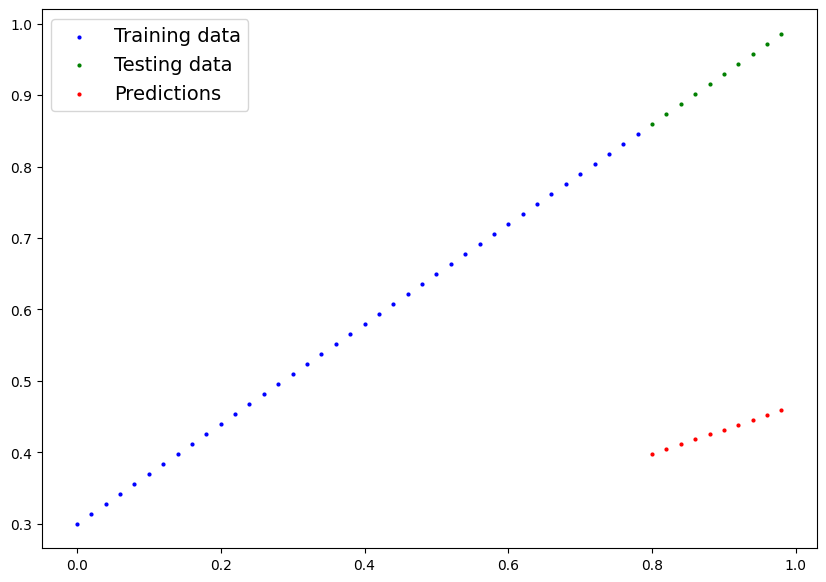

In [23]:
plot_predictions(predictions=y_preds)

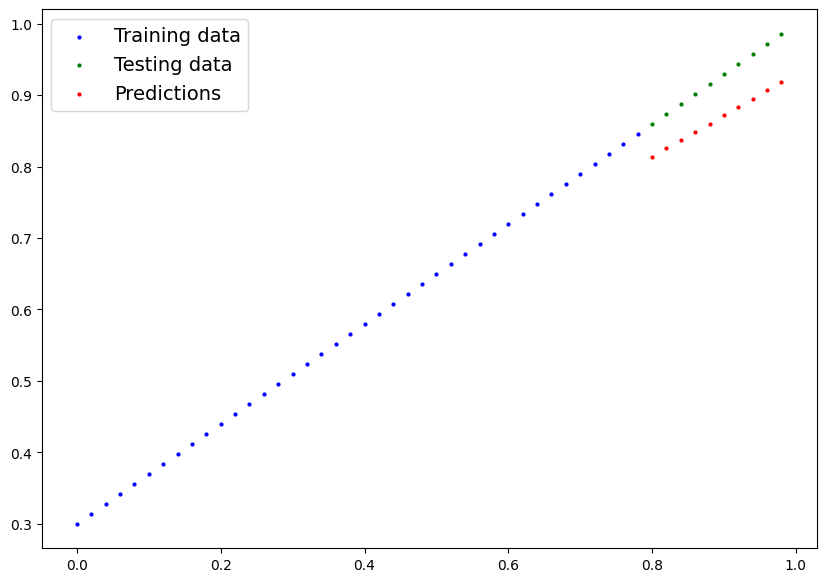

In [24]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. torch.save() - allows you save a PyTorch object in Python's pickle format

2. torch.load() - allows you load a saved PyTorch object

3. torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary

PyTorch save & load code tutorial + extra-curriculum -
 https://pytorch.org/tutorials/beginner#saving_loading_mode-for-inference

In [25]:
##  Saving our pytorch model
from pathlib import Path

# 1.Create models directory
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2 reate model save path 
MODEL_NAME="pytorch_workflow.pth" #.pth or pt is an extension to save pytorch models
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to :models\pytorch_workflow.pth


## Loading  a PyTorch model

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [27]:
#To load in a saved stat_dict we have to initiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

#load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
 

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [29]:
#make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [30]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds    

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [31]:
# Comparing loaded model preds with originL model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [32]:
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

## Putting all together
let's go back through the steps above and sell it all in 1 place

In [33]:
# setup device
device='cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


## 6.1 Data

In [34]:
# create some data using the linear regression formula of y=weight * X + bias
weight=0.7
bias=0.3

#create range values
start=0
end=1
step=0.02

#create X and Y (features & labels)
X=torch.arange(start,end,step).unsqueeze(dim=1) #wo unsqeeze error will occur
y=weight*X+bias
X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [35]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

## 6.2 Building a PyTorch model

In [36]:
#Create a linear model by subclassing nn.Module

class LinearRegressionModelV2 (nn.Module):
    def __init__(self):
        super().__init__()
#Use nn.Linear() for creating the model parameters,also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer= nn.Linear(in_features=1, out_features=1) #input,output of size=1
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(X)

#set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()    

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [38]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [39]:
len(y_pred),len(y_test)

(40, 10)

## 6.3 Training

For training we need:

Loss function

Optimizer

Training loop

Testing loop



In [40]:
# Check the model current device
next(model_1.parameters()).device



device(type='cpu')

In [41]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [42]:
model_1.state_dict() 

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [43]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.01)

In [44]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data) 
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0: 
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

c:\Users\Himani Munjal\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (50) must match the size of tensor b (40) at non-singleton dimension 0

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data) 
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0: 
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

c:\Users\Himani Munjal\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (50) must match the size of tensor b (40) at non-singleton dimension 0

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
weight,bias

(0.7, 0.3)

## Making and evaluating predictions

In [ ]:
# turn model intp evaluation mode
model_1.eval()

#making predictions on d test data
with torch.inference_mode():
    y_preds=model_1(X_test)
y_preds    

tensor([[0.8300],
        [0.8453],
        [0.8606],
        [0.8759],
        [0.8912],
        [0.9065],
        [0.9218],
        [0.9370],
        [0.9523],
        [0.9676],
        [0.9829],
        [0.9982],
        [1.0135],
        [1.0288],
        [1.0441],
        [1.0594],
        [1.0747],
        [1.0900],
        [1.1052],
        [1.1205],
        [1.1358],
        [1.1511],
        [1.1664],
        [1.1817],
        [1.1970],
        [1.2123],
        [1.2276],
        [1.2429],
        [1.2581],
        [1.2734],
        [1.2887],
        [1.3040],
        [1.3193],
        [1.3346],
        [1.3499],
        [1.3652],
        [1.3805],
        [1.3958],
        [1.4111],
        [1.4263],
        [1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

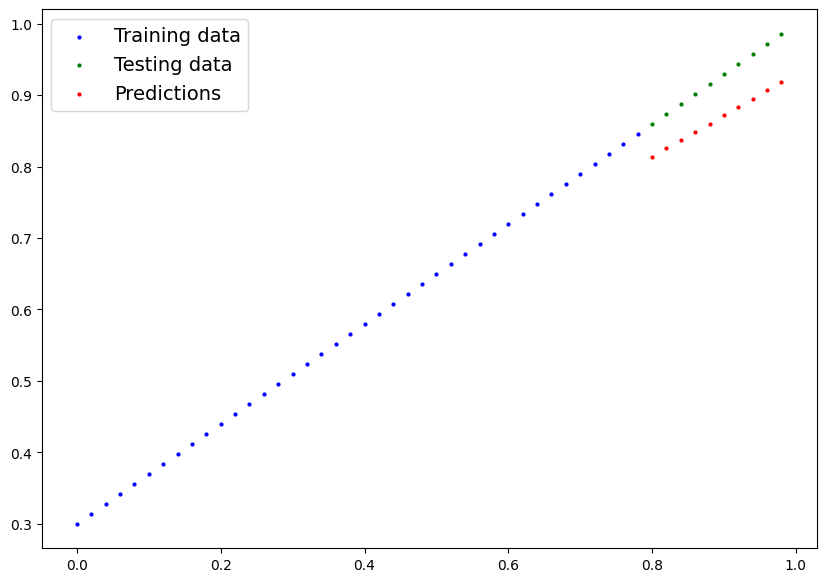

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:
mode